In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from keras.preprocessing import image
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from tensorflow.keras import layers, models
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.optimizers import Adam,RMSprop,SGD,Adamax
from tensorflow.keras.callbacks import LearningRateScheduler
from tensorflow.keras.layers import Dropout
from tensorflow.keras import optimizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
#df = pd.read_csv('fer2013.csv')
data = pd.read_csv('fer2013.csv')

In [19]:
# Preprocess the data
# X = np.array(df['pixels'].apply(lambda x: np.fromstring(x, dtype=int, sep=' ')).tolist())
# X = X.reshape(-1, 48, 48, 1)  # Assuming images are 48x48 pixels
# y = to_categorical(df['emotion'].values)

In [3]:
# Extract pixels and labels from the dataset
pixels = data['pixels'].tolist()
labels = data['emotion'].values

In [20]:
# Split the dataset into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [4]:
# Convert pixels to numpy arrays and reshape for image dimensions
pixels = np.array([np.fromstring(pixel, dtype=int, sep=' ') for pixel in pixels])
pixels = pixels.reshape(-1, 48, 48, 1)  # Reshape for image dimensions

In [5]:
# Convert labels to one-hot encoding
labels = to_categorical(labels, num_classes=7)

In [6]:
# Split the dataset into train and validation sets
train_data, val_data, train_labels, val_labels = train_test_split(pixels, labels, test_size=0.2, random_state=42)

In [7]:
# Data augmentation and preprocessing using ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=10,
                                   width_shift_range=0.1,
                                   height_shift_range=0.1,
                                   shear_range=0.1,
                                   zoom_range=0.1,
                                   horizontal_flip=True)

val_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow(train_data, train_labels, batch_size=32)
val_generator = val_datagen.flow(val_data, val_labels, batch_size=32)

In [62]:
# # Create a simple CNN model with Batch Normalization
# model = models.Sequential()

# # First Convolutional Layer with padding='same'
# model.add(layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(48, 48, 1)))
# model.add(layers.BatchNormalization())
# model.add(layers.MaxPooling2D((2, 2)))

# # Second Convolutional Layer with padding='same'
# model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
# model.add(layers.BatchNormalization())
# model.add(layers.MaxPooling2D((2, 2)))

# # Third Convolutional Layer with padding='same'
# model.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same'))
# model.add(layers.BatchNormalization())
# model.add(layers.MaxPooling2D((2, 2)))

# model.add(layers.Flatten())

# # Dense Layer with padding='same'
# model.add(layers.Dense(128, activation='relu'))
# model.add(layers.BatchNormalization())
# model.add(Dropout(0.8))

# model.add(layers.Dense(7, activation='softmax'))

In [8]:
# Create a modified CNN model with added dropout, data augmentation, and learning rate scheduler
model = models.Sequential()

# Add Convolutional layers with Batch Normalization and MaxPooling
model.add(layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(48, 48, 1)))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.25))  # Dropout layer 1

model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.25))  # Dropout layer 2

model.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(256, (3, 3), activation='relu', padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(512, (3, 3), activation='relu', padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())

model.add(layers.Dense(128, activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.5))  # Dropout layer 3

model.add(layers.Dense(7, activation='softmax'))

c:\Users\PRABHSURAT SINGH\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [9]:
# Implement learning rate scheduler
def lr_scheduler(epoch, lr):
    if epoch % 10 == 0 and epoch > 0:
        lr = lr * 0.9  # Reduce learning rate by 10% every 10 epochs
    return lr

In [63]:

# # Compile the model
# model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [10]:
# Compile the model with learning rate scheduler, optimizer, and loss function
optimizer = optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

In [11]:
# Implement the learning rate scheduler callback during training
lr_callback = tf.keras.callbacks.LearningRateScheduler(lr_scheduler)

In [35]:
# # Save the best model during training
# checkpoint = ModelCheckpoint('best_model.h5', save_best_only=True, monitor='val_accuracy', mode='max', verbose=1)

In [ ]:
# # Train the model
# history = model.fit(X_train, y_train, epochs=20, batch_size=64, validation_data=(X_test, y_test), callbacks=[checkpoint])

In [12]:
# Train the model
history = model.fit(train_generator,
                    epochs=50,
                    validation_data=val_generator,
                    callbacks=[lr_callback])

Epoch 1/50


c:\Users\PRABHSURAT SINGH\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


898/898 ━━━━━━━━━━━━━━━━━━━━ 122s 132ms/step - accuracy: 0.2117 - loss: 2.2549 - val_accuracy: 0.3459 - val_loss: 1.6322 - learning_rate: 0.0010
Epoch 2/50
898/898 ━━━━━━━━━━━━━━━━━━━━ 116s 129ms/step - accuracy: 0.3746 - loss: 1.5924 - val_accuracy: 0.4730 - val_loss: 1.4023 - learning_rate: 0.0010
Epoch 3/50
898/898 ━━━━━━━━━━━━━━━━━━━━ 107s 119ms/step - accuracy: 0.4496 - loss: 1.4316 - val_accuracy: 0.4976 - val_loss: 1.3322 - learning_rate: 0.0010
Epoch 4/50
898/898 ━━━━━━━━━━━━━━━━━━━━ 112s 124ms/step - accuracy: 0.4952 - loss: 1.3450 - val_accuracy: 0.5336 - val_loss: 1.2342 - learning_rate: 0.0010
Epoch 5/50
898/898 ━━━━━━━━━━━━━━━━━━━━ 117s 130ms/step - accuracy: 0.5076 - loss: 1.2914 - val_accuracy: 0.5524 - val_loss: 1.1781 - learning_rate: 0.0010
Epoch 6/50
898/898 ━━━━━━━━━━━━━━━━━━━━ 116s 129ms/step - accuracy: 0.5307 - loss: 1.2542 - val_accuracy: 0.5517 - val_loss: 1.1846 - learning_rate: 0.0010
Epoch 7/50
898/898 ━━━━━━━━━━━━━━━━━━━━ 116s 129ms/step - accuracy: 0.5306 

In [70]:
# # Evaluate the model
# model.load_weights('best_model.h5')  # Load the best weights
# y_pred = model.predict(X_test)
# y_pred_labels = np.argmax(y_pred, axis=1)
# y_true_labels = np.argmax(y_test, axis=1)

225/225 [==============================] - 3s 15ms/step


In [13]:
# Evaluate the model on the validation set
val_loss, val_accuracy = model.evaluate(val_generator)

225/225 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - accuracy: 0.5989 - loss: 1.2093


In [14]:
print(f"Validation Loss: {val_loss}, Validation Accuracy: {val_accuracy}")

Validation Loss: 1.2322003841400146, Validation Accuracy: 0.6082473993301392


In [ ]:
# accuracy = accuracy_score(y_true_labels, y_pred_labels)
# conf_matrix = confusion_matrix(y_true_labels, y_pred_labels)
# classification_rep = classification_report(y_true_labels, y_pred_labels)

# print(f'Accuracy: {accuracy}')
# print(f'Confusion Matrix:\n{conf_matrix}')
# print(f'Classification Report:\n{classification_rep}')

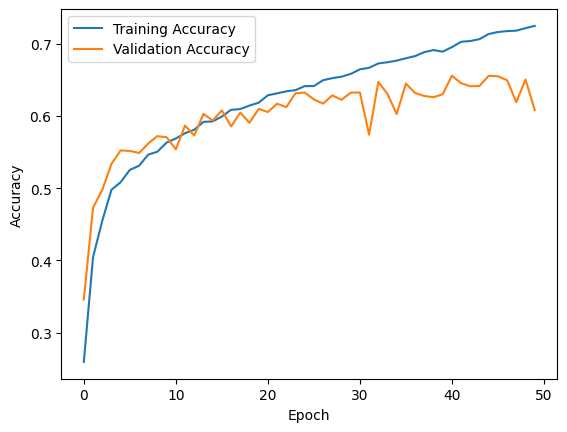

In [15]:
# Plot training history
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

(48, 48)


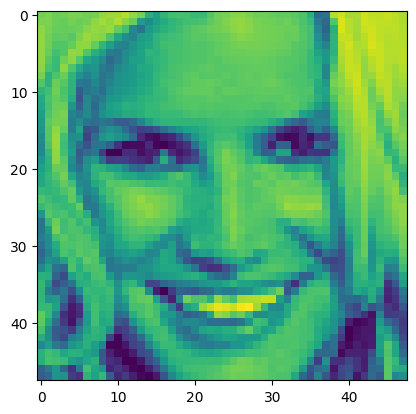

In [16]:
img = image.load_img("pics\happy3.jpg",target_size = (48,48),color_mode = "grayscale")
img = np.array(img)
plt.imshow(img)
print(img.shape) #prints (48,48) that is the shape of our image

In [17]:
label_dict = {0:'Angry',1:'Disgust',2:'Fear',3:'Happy',4:'Neutral',5:'Sad',6:'Surprise'}

In [18]:
img = np.expand_dims(img,axis = 0) #makes image shape (1,48,48)
img = img.reshape(1,48,48,1)
result = model.predict(img)
result = list(result[0])
print(result)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 263ms/step
[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


In [19]:
img_index = result.index(max(result))
print(label_dict[img_index])
plt.show()

Angry


In [49]:
print(accuracy)

0.5728615213151296
